In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from urllib.request import urlopen
import json
import us
import numpy as np
import seaborn as sns
from sklearn import linear_model
import statsmodels.api as sm
import sys
import plotly.graph_objects as go

# Job satisfaction analysis using Glassdoor data

<p><a name="sections"></a></p>

# Sections

- <a href="#DS">Data Structure</a><br>
- <a href="#UD">Understanding the data</a><br>
- <a href="#benefrate">How does the different ratings depends on the benefits ?</a><br>
- <a href="#correl">Correlations mapping</a><br>
- <a href="#reg">Multi linear regression</a><br>
- <a href="#location">Are the ratings dependant on location ?</a><br>


<p><a name="#DS"></a></p>

# Data structure

The data is structured in 3 sections :
- General data from the company (name, industry, revenue)
- List of company's benefits
- Informations relative to reviews (author location, ratings, position, ...)

In [7]:
# Downloading the data

data1 = pd.read_csv('/home/dantole/Documents/glassdoor_reviews.csv')
data2 = pd.read_csv('/home/dantole/Documents/glassdoor_reviews2.csv')
data3 = pd.read_csv('/home/dantole/Documents/glassdoor_reviews3.csv')
data4 = pd.read_csv('/home/dantole/Documents/glassdoor_reviews4.csv')
data5 = pd.read_csv('/home/dantole/Documents/glassdoor_reviews5.csv')

# data = pd.concat([data1, data2], ignore_index=True)
data = pd.concat([data1, data2, data3, data4, data5], ignore_index=True)

In [8]:
pd.set_option('display.max_columns', 60)
data.sample(5)

B_Accidental_Death_Dismemberment_Insurance B_Bereavement_Leave  \
9312                          100 of 119 (84.03%)   62 of 119 (52.1%)   
930157                          10 of 15 (66.67%)    9 of 14 (64.29%)   
199523                          40 of 83 (48.19%)   50 of 84 (59.52%)   
205555                          27 of 76 (35.53%)   34 of 76 (44.74%)   
980835                               6 of 8 (75%)      5 of 8 (62.5%)   

       B_Charitable_Gift_Matching B_Commuter_Checks_Assistance  \
9312            10 of 121 (8.26%)           41 of 120 (34.17%)   
930157            1 of 14 (7.14%)             4 of 15 (26.67%)   
199523          13 of 84 (15.48%)            12 of 83 (14.46%)   
205555          17 of 76 (22.37%)            13 of 76 (17.11%)   
980835            3 of 9 (33.33%)              1 of 9 (11.11%)   

       B_Company_Social_Events   B_Dental_Insurance    B_Dependent_Care  \
9312        79 of 121 (65.29%)  290 of 316 (91.77%)  46 of 120 (38.33%)   
930157        6 of 14 (42.86%)     10 of 16 (62.5%)       3 of 15 (20%)   
199523       20 of 85 (23.53%)   70 of 101 (69.31%)   16 of 83 (19.28%)   
205555          19 of 76 (25%)    37 of 77 (48.05%)   21 of 76 (27.63%)   
980835         3 of 9 (33.33%)        9 of 10 (90%)     4 of 9 (44.44%)   

       B_Disability_Insurance B_Diversity_Program  \
9312       91 of 119 (76.47%)  64 of 119 (53.78%)   
930157      11 of 15 (73.33%)       6 of 15 (40%)   
199523      48 of 83 (57.83%)   18 of 83 (21.69%)   
205555      30 of 76 (39.47%)   18 of 76 (23.68%)   
980835           6 of 8 (75%)     5 of 9 (55.56%)   

       B_Employee_Assistance_Program  B_Employee_Discount  \
9312               69 of 120 (57.5%)   57 of 121 (47.11%)   
930157                 9 of 15 (60%)    55 of 56 (98.21%)   
199523             31 of 83 (37.35%)  397 of 411 (96.59%)   
205555             34 of 76 (44.74%)   382 of 400 (95.5%)   
980835               11 of 11 (100%)    37 of 38 (97.37%)   

       B_Employee_Stock_Purchase_Plan B_Equity_Incentive_Plan  \
9312                  18 of 120 (15%)       15 of 120 (12.5%)   
930157                   0 of 15 (0%)        2 of 14 (14.29%)   
199523               20 of 83 (24.1%)       19 of 83 (22.89%)   
205555              34 of 76 (44.74%)       12 of 76 (15.79%)   
980835                  9 of 10 (90%)         4 of 9 (44.44%)   

       B_Family_Medical_Leave B_Flexible_Spending_Account  \
9312       64 of 120 (53.33%)         118 of 162 (72.84%)   
930157      11 of 16 (68.75%)            8 of 15 (53.33%)   
199523      47 of 84 (55.95%)           39 of 83 (46.99%)   
205555      44 of 76 (57.89%)           26 of 76 (34.21%)   
980835        6 of 9 (66.67%)             7 of 9 (77.78%)   

       B_Free_Lunch_or_Snacks    B_Gym_Membership B_Health_Care_On_Site  \
9312       13 of 120 (10.83%)  20 of 120 (16.67%)    29 of 121 (23.97%)   
930157       3 of 16 (18.75%)     1 of 15 (6.67%)       1 of 14 (7.14%)   
199523      14 of 84 (16.67%)    11 of 84 (13.1%)       5 of 84 (5.95%)   
205555       9 of 78 (11.54%)     3 of 76 (3.95%)       1 of 76 (1.32%)   
980835          2 of 10 (20%)       1 of 10 (10%)           0 of 9 (0%)   

         B_Health_Insurance B_Health_Savings_Account       B_Job_Training  \
9312    688 of 718 (95.82%)       106 of 121 (87.6%)  217 of 315 (68.89%)   
930157    25 of 35 (71.43%)         8 of 15 (53.33%)    25 of 31 (80.65%)   
199523  112 of 173 (64.74%)        40 of 84 (47.62%)  148 of 189 (78.31%)   
205555    43 of 78 (55.13%)        24 of 76 (31.58%)  323 of 371 (87.06%)   
980835    38 of 39 (97.44%)          7 of 9 (77.78%)        8 of 10 (80%)   

                B_K401_Plan  B_Legal_Assistance    B_Life_Insurance  \
9312    133 of 181 (73.48%)  39 of 121 (32.23%)  102 of 121 (84.3%)   
930157       40 of 50 (80%)    3 of 14 (21.43%)   11 of 15 (73.33%)   
199523  186 of 265 (70.19%)   11 of 83 (13.25%)   52 of 85 (61.18%)   
205555    41 of 78 (52.56%)   20 of 76 (26.32%)      38 of 76 (50%)   
980835 

In [9]:
pd.set_option('display.max_rows', 20)
numb_reviews = data.groupby(by='S_Industry').agg({'S_CName':'count'})
numb_reviews.columns = ['Number_Reviews']
summary_data = pd.concat((data.groupby(by=['S_Industry']).agg({'S_CName':'nunique'}), numb_reviews), axis=1).sort_values(by='Number_Reviews', ascending=False)

summary_data

S_CName  Number_Reviews
S_Industry                                                   
 Health Care Services & Hospitals         183           80666
 Colleges & Universities                  165           75052
 Computer Hardware & Software             140           59408
 Department, Clothing, & Shoe Stores       91           44078
 IT Services                               93           38550
...                                       ...             ...
 Upscale Restaurants                        1             447
 Ticket Sales                               1             430
 Parking Lots & Garages                     1             415
 Wood Product Manufacturing                 1             404
 Moving Services                            1             378

[118 rows x 2 columns]

In [10]:
# Creating a the lists of ratings and benefits label
list_ratings = data.columns.to_list()[51:57]
list_benefits = data.columns.to_list()[0:48]

<p><a name="#UD"></a></p>

# Understanding the data

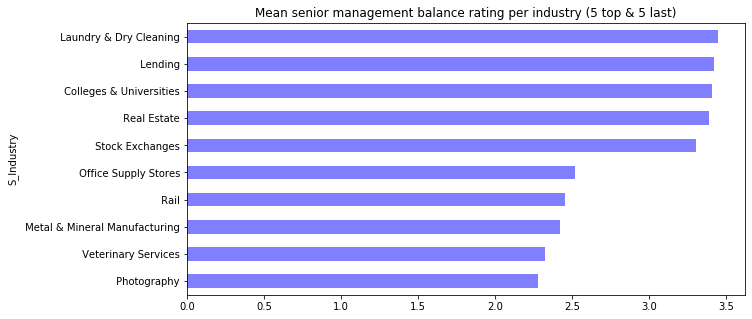

In [11]:
# Graph to show which industry has the best overall rating
tail = data.groupby('S_Industry')['R_RSenior_manag'].mean().sort_values(ascending=True).tail(5)
ax = data.groupby('S_Industry')['R_RSenior_manag'].mean().sort_values(ascending=True).head(5).append(tail.tail(5)).plot(kind='barh', 
                                                                                                                   color='blue', 
                                                                                                                   figsize=(10,5), 
                                                                                                                   alpha=0.5,
                                                                                                                   title='Mean senior management balance rating per industry (5 top & 5 last)')
ax.get_figure().savefig('senior_manag_industry.png')

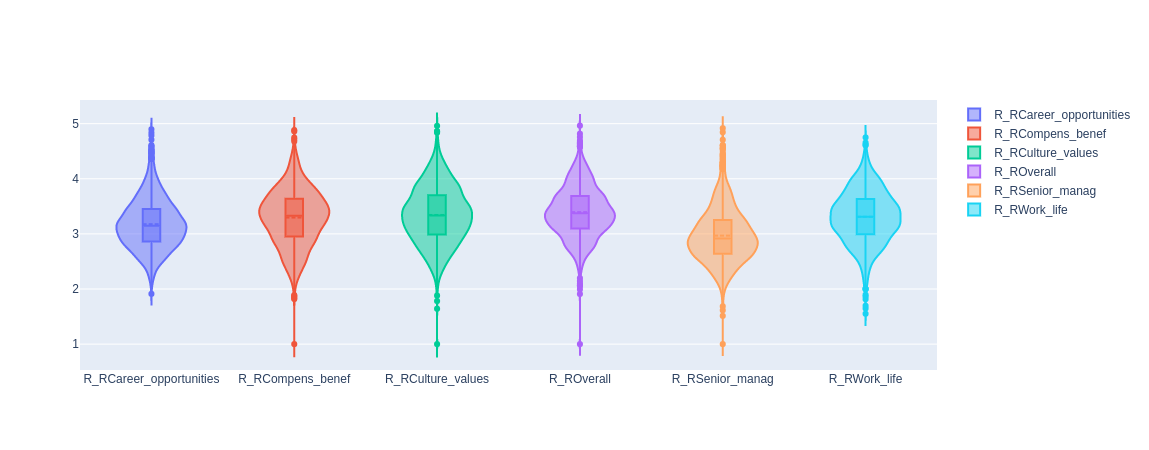

In [12]:
fig = go.Figure()

df = data.groupby('S_CName')[list_ratings].mean()

for rating in list_ratings:
    fig.add_trace(go.Violin(y=df[rating],
        name=rating,
        box_visible=True,
        meanline_visible=True))
fig.show()

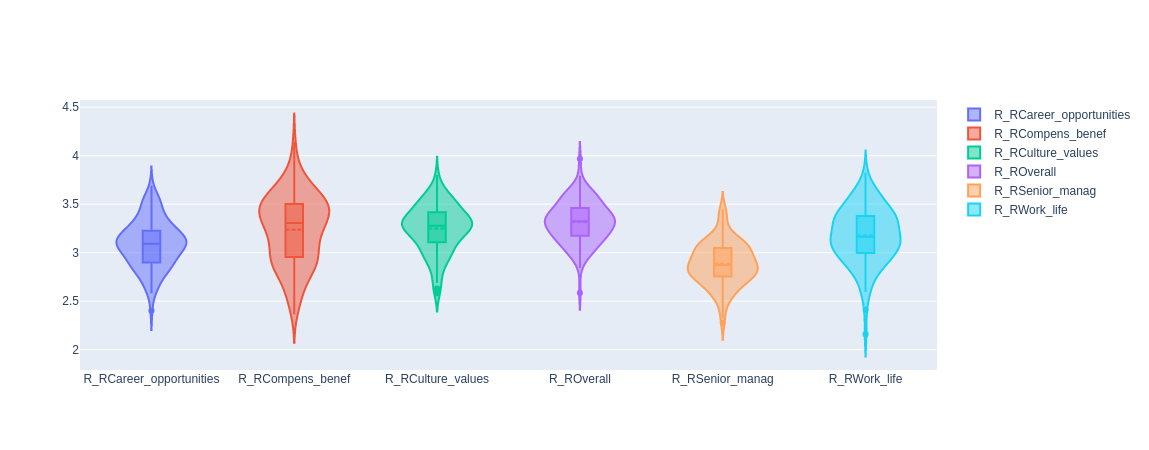

In [14]:
fig = go.Figure()

df = data.groupby('S_Industry')[list_ratings].mean()

for rating in list_ratings:
    fig.add_trace(go.Violin(y=df[rating],
        name=rating,
        box_visible=True,
        meanline_visible=True))
fig.show()

In [15]:
def get_percentage_benef(data, benefit):
    '''
        Extract the percentage from a benefit column
        parameters:
        ---------------
        - data : 1 column dataframe
        - benefit : the label of the benefit
        return:
        ---------------
        This functions returns a dataframe containing the percentages values
    '''
    if benefit not in data.columns.to_list():
        raise TypeError('Column missing')
    res = pd.DataFrame([float(b.split('(')[1][-7:-2]) for b in data[benefit]])
    res.columns = [benefit]
    return res

In [16]:
data_benefits = pd.DataFrame()
for benef in list_benefits:
    data_benefits[[benef]] = get_percentage_benef(data, benef)
    
data_benefits.head()

B_Accidental_Death_Dismemberment_Insurance  B_Bereavement_Leave  \
0                                       84.38                54.84   
1                                       84.38                54.84   
2                                       84.38                54.84   
3                                       84.38                54.84   
4                                       84.38                54.84   

   B_Charitable_Gift_Matching  B_Commuter_Checks_Assistance  \
0                         0.0                          9.68   
1                         0.0                          9.68   
2                         0.0                          9.68   
3                         0.0                          9.68   
4                         0.0                          9.68   

   B_Company_Social_Events  B_Dental_Insurance  B_Dependent_Care  \
0                    61.29               91.96             29.03   
1                    61.29               91.96             29.03   
2                    61.29               91.96             29.03   
3                    61.29               91.96             29.03   
4                    61.29               91.96             29.03   

   B_Disability_Insurance  B_Diversity_Program  B_Employee_Assistance_Program  \
0                   78.12                53.12                          40.62   
1                   78.12                53.12                          40.62   
2                   78.12                53.12                          40.62   
3                   78.12                53.12                          40.62   
4                   78.12                53.12                          40.62   

   B_Employee_Discount  B_Employee_Stock_Purchase_Plan  \
0                31.25                            9.38   
1                31.25                            9.38   
2                31.25                            9.38   
3                31.25                            9.38   
4                31.25                            9.38   

   B_Equity_Incentive_Plan  B_Family_Medical_Leave  \
0                     12.5                   54.84   
1                     12.5                   54.84   
2                     12.5                   54.84   
3                     12.5                   54.84   
4                     12.5                   54.84   

   B_Flexible_Spending_Account  B_Free_Lunch_or_Snacks  B_Gym_Membership  \
0                        45.16                    6.06              9.09   
1                        45.16                    6.06              9.09   
2                        45.16                    6.06              9.09   
3                        45.16                    6.06              9.09   
4                        45.16                    6.06              9.09   

   B_Health_Care_On_Site  B_Health_Insurance  B_Health_Savings_Account  \
0                  28.12               94.51                     64.52   
1                  28.12               94.51                     64.52   
2                  28.12               94.51                     64.52   
3                  28.12               94.51                     64.52   
4                  28.12               94.51                     64.52   

   B_Job_Training  B_K401_Plan  B_Legal_Assistance  B_Life_Insurance  \
0           53.12        45.45               26.67              69.7   
1           53.12        45.45               26.67              69.7   
2           53.12        45.45               26.67              69.7   
3           53.12        45.45               26.67              69.7   
4           53.12        45.45               26.67              69.7   

   B_Maternity_Paternity_Leave  B_Mental_Health_Care  B_Military_Leave  \
0                        78.46                 22.58             29.03   
1                        78.46                 22.58             29.03   
2                        78.46                 22.58             29.03   
3 

<p><a name="#benefrate"></a></p>

# How does the different ratings depends on the benefits ?

In [17]:
i = 33

1


ValueError: color kwarg must have one color per data set. 2 data sets and 1 colors were provided

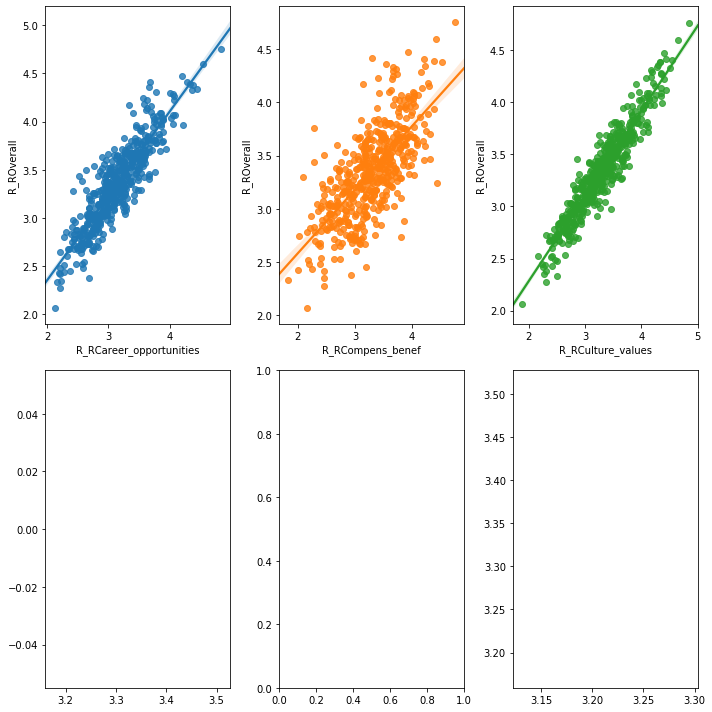

In [29]:
benefit = list_benefits[i]
print(i)
i=i+1

# Creating a dataframe that contains the names and associated benefits (in percentage) of unique companies
data_benef = pd.concat((data[['S_CName']], data_benefits[[benefit]]), axis=1).groupby(by='S_CName')[benefit].unique()
data_benef = pd.DataFrame(list(map(lambda l : l[0], data_benef)))
data_benef.columns=[benefit]

nrows = 2; ncols = 3
fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(10,10))

for i in range(nrows):
    for j in range(ncols):
        rating = list_ratings[i*ncols + j]
        plot_data = pd.concat((data.groupby(by='S_CName').mean().reset_index()[["R_ROverall"]][0:500], data.groupby(by='S_CName').mean().reset_index()[[rating]][0:500]), axis=1)
        if rating == "R_ROverall":
            sns.distplot(plot_data[rating], plot_data, ax=ax[i,j], kde=False)
            continue
        sns.regplot(rating, 'R_ROverall', plot_data, ax=ax[i,j])
        plt.tight_layout()
#     ax[index].scatter(plot_data[benefit], plot_data[rating])
#     ax[index].set_xlabel(benefit)
#     ax[index].set_ylabel(rating)

# plot_data.plot.scatter(x=benefit, y=rating)

<p><a name="#correl"></a></p>

# Correlations mapping

In [195]:
# dataframe of all the correlations between benefits and ratings
data_temp = pd.concat((data_benefits, data[list_ratings]), axis=1).dropna()
data_corr = data_temp.corr()[list_ratings]

In [225]:
data_corr

R_RCareer_opportunities  \
B_Accidental_Death_Dismemberment_Insurance                 0.056544   
B_Bereavement_Leave                                        0.033049   
B_Charitable_Gift_Matching                                 0.063658   
B_Commuter_Checks_Assistance                               0.091622   
B_Company_Social_Events                                    0.147189   
...                                                             ...   
R_RCompens_benef                                           0.617355   
R_RCulture_values                                          0.697797   
R_ROverall                                                 0.770212   
R_RSenior_manag                                            0.715827   
R_RWork_life                                               0.535859   

                                            R_RCompens_benef  \
B_Accidental_Death_Dismemberment_Insurance          0.181742   
B_Bereavement_Leave                                 0.165402   
B_Charitable_Gift_Matching                          0.183052   
B_Commuter_Checks_Assistance                        0.160220   
B_Company_Social_Events                             0.219783   
...                                                      ...   
R_RCompens_benef                                    1.000000   
R_RCulture_values                                   0.559132   
R_ROverall                                          0.633273   
R_RSenior_manag                                     0.564366   
R_RWork_life                                        0.490894   

                                            R_RCulture_values  R_ROverall  \
B_Accidental_Death_Dismemberment_Insurance           0.032842    0.034770   
B_Bereavement_Leave                                  0.020340    0.018957   
B_Charitable_Gift_Matching                           0.076566    0.071511   
B_Commuter_Checks_Assistance                         0.100484    0.096686   
B_Company_Social_Events                              0.162743    0.143605   
...                                                       ...         ...   
R_RCompens_benef                                     0.559132    0.633273   
R_RCulture_values                                    1.000000    0.807274   
R_ROverall                                           0.807274    1.000000   
R_RSenior_manag                                      0.785317    0.801451   
R_RWork_life                                         0.637516    0.659188   

                                            R_RSenior_manag  R_RWork_life  
B_Accidental_Death_Dismemberment_Insurance         0.014389      0.044492  
B_Bereavement_Leave                               -0.000985      0.036905  
B_Charitable_Gift_Matching                         0.049150      0.090160  
B_Commuter_Checks_Assistance                       0.075303      0.111234  
B_Company_Social_Events                            0.129818      0.132227  
...                                                     ...           ...  
R_RCompens_benef                                   0.564366      0.490894  
R_RCulture_values                                  0.785317      0.637516  
R_ROverall                                         0.801451      0.659188  
R_RSenior_manag                                    1.000000      0.631239  
R_RWork_life                                       0.631239      1.000000  

[54 rows x 6 columns]

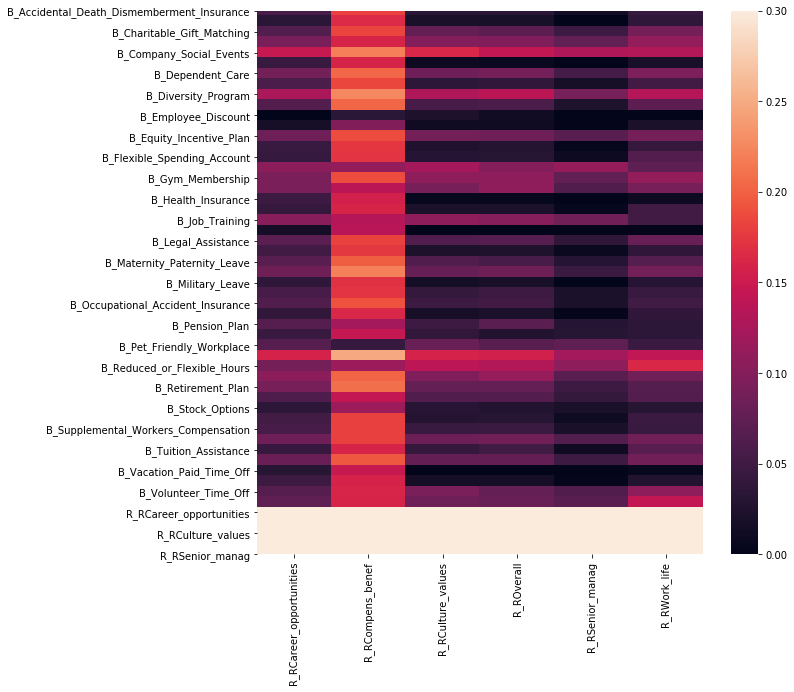

In [142]:
plt.figure(figsize=(10,10))

# mat_tril = np.triu(data_corr)
ax = sns.heatmap(data_corr, vmin=0, vmax=0.3)
plt.savefig('correl.png')

<p><a name="#reg"></a></p>

# Multi linear regression

In [196]:
# list_ratings.remove('R_ROverall')
list_ratings

['R_RCareer_opportunities',
 'R_RCompens_benef',
 'R_RCulture_values',
 'R_ROverall',
 'R_RSenior_manag',
 'R_RWork_life']

In [198]:
X = data_temp[list_ratings]
y = data_temp['R_ROverall']

reg = linear_model.LinearRegression()
reg.fit(X,y)

print('Intercept: \n', reg.intercept_)
print('Coefficients: \n', abs(reg.coef_))

Intercept: 
 3.206324095117452e-13
Coefficients: 
 [6.42013244e-14 2.91137397e-14 1.72150172e-14 1.00000000e+00
 1.49647924e-16 5.10068626e-17]


<p><a name="#location"></a></p>

# Are the ratings dependant on location ?

In [5]:
def get_USstate_full(location):
    '''
        Get the US state name given the abbreviation
    '''
    try:
        if location.split(', ')[1] in us.states.mapping('fips', 'abbr').values():
            return us.states.mapping('fips', 'abbr')[location.split(', ')[1]]
        else:
            return np.nan
    except:
        return np.nan
    
def get_USstate_abbr(location):
    '''
        Get the US state abbr code from the format city, abbr
    '''
    states = us.states.mapping('fips', 'abbr').values()
    abbr = location.split(', ')[-1]
    if abbr in states:
        return abbr
    else:
        return np.nan
#     temp = list(map(lambda d : d.split(', ')[-1], location.dropna()))
#     temp = temp[temp in states]
#     return temp
    
    
    
    
#     index_bool = [t in us.states.mapping('fips', 'abbr').values() for t in temp]
#     return temp[index_bool]
#     except:
#         return np.nan

In [6]:
location_state = pd.concat((data['R_Author_Location'].dropna().apply(lambda x : get_USstate_abbr(x)), data[list_ratings]), axis=1)
# data['R_Author_Location'].dropna().apply(lambda x : get_USstate_abbr(x))

location_state = location_state.dropna(subset=['R_ROverall', 'R_Author_Location'])
location_state.groupby(by='R_Author_Location').mean()

R_RCareer_opportunities  R_RCompens_benef  \
R_Author_Location                                              
AK                                3.339181          3.488304   
AL                                3.160586          3.233060   
AR                                3.187973          3.295898   
AZ                                3.153140          3.323211   
CA                                3.232931          3.386355   
CO                                3.070099          3.235598   
CT                                3.138244          3.267411   
DE                                3.159051          3.333040   
FL                                3.173607          3.283177   
GA                                3.138821          3.291698   
GU                                3.466667          3.166667   
HI                                3.406494          3.459740   
IA                                3.189122          3.348859   
ID                                3.328164          3.508065   
IL                                3.102489          3.281677   
IN                                3.113433          3.302126   
KS                                3.150000          3.389019   
KY                                3.095684          3.266091   
LA                                3.235349          3.264651   
MA                                3.195103          3.339221   
MD                                3.187479          3.296814   
ME                                3.134255          3.331688   
MI                                3.168633          3.304759   
MN                                3.173419          3.332071   
MO                                3.180730          3.331744   
MS                                3.288525          3.364590   
MT                                3.352617          3.429752   
NC                                3.110278          3.250137   
ND                                3.115163          3.211132   
NE                                3.084373          3.326853   
NH                                3.073510          3.200000   
NJ                                3.047890          3.271812   
NM                                3.185154          3.302901   
NV                                3.102001          3.168281   
NY                                3.129341          3.257422   
OH                                3.119473          3.234214   
OK                                3.228312          3.471169   
OR                                3.083087          3.234324   
PA                                3.109315          3.252764   
PR                                3.193939          3.442424   
RI                                3.156972          3.373705   
SC                                3.111579          3.222147   
SD                                3.272237          3.256065   
TN                                3.229733          3.382580   
TX                                3.154043          3.326377   
UT                                3.350464          3.545725   
VA                                3.162162          3.266180   
VI                                3.142857          3.571429   
VT                                3.066838          3.120823   
WA                                3.190155          3.281620   
WI                                3.170356          3.338418   
WV                                3.006296          3.228751   
WY                                2.933333          2.963889   

                   R_RCulture_values  R_ROverall  R_RSenior_manag  \
R_Author_Location                                                   
AK                          3.494152    3.534819         3.134503   
AL                          3.286920    3.367162         2.947381   
AR                          3.352847    3.385166         2.945440   
AZ                          3.320880    3.310515         2.957157   
CA                          3.409647    3.431154         3.021099   
CO             

In [7]:
location_state['text'] = str(location_state['R_Author_Location']) + '<br>' + \
'Overall ' + str(location_state['R_ROverall']) + '<br>' + \
'Compensation & benefit' + str(location_state['R_RCompens_benef']) + '<br>' + \
'Senior management' + str(location_state['R_RSenior_manag'])  + '<br>' + \
'Culture & values' + str(location_state['R_RCulture_values']) + '<br>' + \
'Career opportunities ' + str(location_state['R_RCareer_opportunities']) + '<br>' + \
'Work life balance' + str(location_state['R_RWork_life'])

In [21]:
location_state = location_state.sample(200000)

In [ ]:
fig = go.Figure(data=go.Choropleth(
    locations=location_state['R_Author_Location'],
    z=location_state['R_ROverall'].astype(float),
    locationmode='USA-states',
    colorscale='Reds',
    autocolorscale=False,
    text=location_state['text'], # hover text
    marker_line_color='white', # line markers between states
    colorbar_title="Ratings"
))

fig.update_layout(
    title_text='Ratings per US state',
    geo = dict(
        scope='usa',
        projection=go.layout.geo.Projection(type = 'albers usa'),
        showlakes=True, # lakes
        lakecolor='rgb(255, 255, 255)'),
)

fig.show()

In [202]:
location_state.groupby('R_Author_Location').describe()

R_RCareer_opportunities                                     \
                                    count      mean       std  min  25%  50%   
R_Author_Location                                                              
AK                                  342.0  3.339181  1.383454  1.0  2.0  4.0   
AL                                 4029.0  3.160586  1.396113  1.0  2.0  3.0   
AR                                 2511.0  3.187973  1.412984  1.0  2.0  3.0   
AZ                                14588.0  3.153140  1.485422  1.0  2.0  3.0   
CA                                75692.0  3.232931  1.401376  1.0  2.0  3.0   
...                                   ...       ...       ...  ...  ...  ...   
VT                                  389.0  3.066838  1.390563  1.0  2.0  3.0   
WA                                12737.0  3.190155  1.396431  1.0  2.0  3.0   
WI                                 7408.0  3.170356  1.417218  1.0  2.0  3.0   
WV                                  953.0  3.006296  1.439232  1.0  2.0  3.0   
WY                                  360.0  2.933333  1.447695  1.0  2.0  3.0   

                            R_RCompens_benef                                \
                   75%  max            count      mean       std  min  25%   
R_Author_Location                                                            
AK                 5.0  5.0            342.0  3.488304  1.289994  1.0  3.0   
AL                 4.0  5.0           4029.0  3.233060  1.355609  1.0  2.0   
AR                 4.0  5.0           2511.0  3.295898  1.322371  1.0  2.0   
AZ                 5.0  5.0          14588.0  3.323211  1.368867  1.0  2.0   
CA                 4.0  5.0          75692.0  3.386355  1.286298  1.0  3.0   
...                ...  ...              ...       ...       ...  ...  ...   
VT                 4.0  5.0            389.0  3.120823  1.317332  1.0  2.0   
WA                 4.0  5.0          12737.0  3.281620  1.296098  1.0  2.0   
WI                 4.0  5.0           7408.0  3.338418  1.306669  1.0  2.0   
WV                 4.0  5.0            953.0  3.228751  1.406069  1.0  2.0   
WY                 4.0  5.0            360.0  2.963889  1.396903  1.0  2.0   

                                 R_RCulture_values                           \
                   50%  75%  max             count      mean       std  min   
R_Author_Location                                                             
AK                 4.0  5.0  5.0             342.0  3.494152  1.409528  1.0   
AL                 3.0  4.0  5.0            4029.0  3.286920  1.478102  1.0   
AR                 3.0  4.0  5.0            2511.0  3.352847  1.473184  1.0   
AZ                 3.0  5.0  5.0           14588.0  3.320880  1.546672  1.0   
CA                 4.0  4.0  5.0           75692.0  3.409647  1.470568  1.0   
...                ...  ...  ...               ...       ...       ...  ...   
VT                 3.0  4.0  5.0             389.0  3.017995  1.506749  1.0   
WA                 3.0  4.0  5.0           12737.0  3.364136  1.472239  1.0   
WI                 3.0  4.0  5.0            7408.0  3.298326  1.506330  1.0   
WV                 3.0  4.0  5.0             953.0  3.056663  1.539037  1.0   
WY                 3.0  4.0  5.0             360.0  2.966667  1.549193  1.0   

                                       R_ROverall                           \
                   25%  50%   75%  max      count      mean       std  min   
R_Author_Location                                                            
AK                 3.0  4.0  5.00  5.0      359.0  3.534819  1.267685  1.0   
AL                 2.0  3.0  5.00  5.0     4306.0  3.367162  1.338826  1.0   
AR                 2.0  4.0  5.00  5.0     2656.0  3.385166  1.338827  1.0   
AZ                 2.0  4.0  5.00  5.0    15236.0  3.310515  1.444112  1.0   
CA                 2.0  4.0  5.00  5.0    79939.0  3.431154  1.362456  1.0   
...                ...  ...   ...  ...        ...       ...       ...  ..

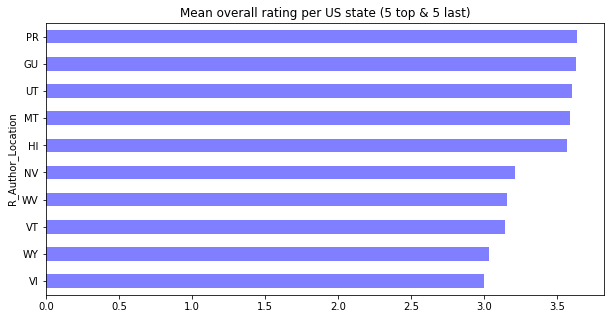

In [206]:
# tail = data.groupby('S_Industry')['R_RSenior_manag'].mean().sort_values(ascending=True).tail(5)
# ax = data.groupby('S_Industry')['R_RSenior_manag'].mean().sort_values(ascending=True).head(5).append(tail.tail(5)).plot(kind='barh', 
#                                                                                                                    color='blue', 
#                                                                                                                    figsize=(10,5), 
#                                                                                                                    alpha=0.5,
#                                                                                                                    title='Mean senior management balance rating per industry (5 top & 5 last)')
# ax.get_figure().savefig('senior_manag_industry.png')

tail = location_state.groupby('R_Author_Location')['R_ROverall'].mean().sort_values(ascending=True).tail(5)
ax = location_state.groupby('R_Author_Location')['R_ROverall'].mean().sort_values(ascending=True).head(5).append(tail.tail(5)).plot(kind='barh', 
                                                                                                                                    color='blue', 
                                                                                                                                    figsize=(10,5),
                                                                                                                                    alpha=.5,
                                                                                                                                    title="Mean overall rating per US state (5 top & 5 last)")